# Imports

In [2]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import time
import math
import seaborn as sns

# Activity A

In [3]:
# Load data
proposal = pd.read_csv("PROPERTY_PROPOSAL.csv")
proposal

,thread_subject,username,page_name
0,08euroRupersonID,ديفيد عادل وهبة خليل 2,WikidataPropertyproposal08euroRupersonID.json
1,08euroRupersonID,Pintoch,WikidataPropertyproposal08euroRupersonID.json
2,100bombardirovpersonID,Сидик из ПТУ,WikidataPropertyproposal100bombardirovpersonID...
3,100bombardirovpersonID,ديفيد عادل وهبة خليل 2,WikidataPropertyproposal100bombardirovpersonID...
4,100bombardirovpersonID,Gabbg82,WikidataPropertyproposal100bombardirovpersonID...
...,...,...,...
52155,発車メロディ,MSGJ,WikidataPropertyproposal発車メロディ.json
52156,雑誌コード,Mario1257,WikidataPropertyproposal雑誌コード.json
52157,雑誌コード,ArthurPSmith,WikidataPropertyproposal雑誌コード.json
52158,雑誌コード,Nepalicoi,WikidataPropertyproposal雑誌コード.json


In [4]:
#Check the code, the weights probably can be 2s
def create_network(data):
    # Get all unique usernames
    unique_usernames = data.username.unique()  # O(n)

    # Assign a user ID to each unique username
    ids_to_username = {i: unique_usernames[i] for i in range(len(unique_usernames))} # O(m) where m is the # unique m<<<n
    username_to_ids = dict((v,k) for k,v in ids_to_username.items()) # same

    # Find all combinations of threads and page_name
    df_combinations = data.groupby(["thread_subject", "page_name"])["username"].apply(set).reset_index(name="all_ids") # O(n)

    # For all IDs in combinations, find all possible pairwise combinations of IDs. 
    # These will be the edges found in the data
    df_combinations["edges"] = df_combinations["all_ids"].apply(lambda x: set(itertools.combinations(x, 2))) #o(n) in the worst case

    # combine all edges list into one
    edges_tuples = set.union(*df_combinations['edges'].tolist()) # o(n)

    # Create graph adjancency matrix
    # Prepopulate matrix with zeroes
    A = np.zeros((len(unique_usernames), len(unique_usernames))) # o(1)

    # Add all edges found.
    for edge in edges_tuples:   # o(n)
        id_0 = username_to_ids[edge[0]]
        id_1 = username_to_ids[edge[1]]
        A[id_0, id_1] = 1
        A[id_1, id_0] = 1

    # Create Graph
    G = nx.from_numpy_array(A)  # o(n)

    return G, ids_to_username

In [5]:
G, ids_to_username = create_network(proposal)

## Analysis of cost

In [35]:
# Predefine sizes
data_sizes = list(range(1, 50000, 500))

times_per_size = []
for n in data_sizes:
    # Select n observations
    data = proposal[:n]
    # Start timer
    start_time = time.time()
    # Create network for n observations
    G_n, ids_to_username_n = create_network(data)
    # Stop timer
    times_per_size.append(time.time()-start_time)

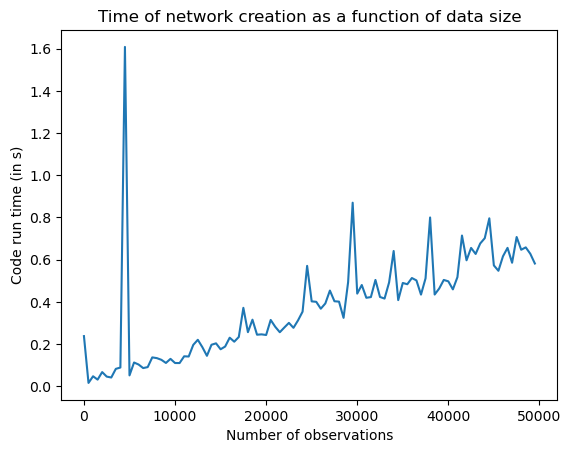

In [38]:
plt.plot(data_sizes, times_per_size)

#Add title, axis labels and show the plot
plt.title("Time of network creation as a function of data size")
plt.xlabel("Number of observations")
plt.ylabel("Code run time (in s)")
plt.show()

The complexity analysis of the algorithm is carried out an it can be observed that the algorithm takes $O(n)$ time to execute.

In [5]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, from_networkx

output_notebook()

Loading BokehJS ...

In [11]:
crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1))

plot = figure(
    title="Using Bokeh with Networkx: a demo",
    tools="", toolbar_location=None, **crop_factors
)

graph_plot = from_networkx(
    G, nx.spring_layout, scale=7, center=(0,0))
plot.renderers.append(graph_plot)

#output_file("networkx_graph.html")
show(plot)

# Activity B

In [6]:
print ("Number of nodes: %i" % nx.number_of_nodes (G))
print ("Number of edges: %i" % nx.number_of_edges (G))
print ("Number of connected components: %i" % nx.number_connected_components (G))
degree_sequence = [d for n, d in G.degree()]
mean_degree = sum (degree_sequence) / len (degree_sequence)
print ("Mean average degree: %i" % mean_degree)
avg_clustering_coeff = nx.algorithms.cluster.average_clustering(G)
print("Average clustering coefficient: {}".format(avg_clustering_coeff))
try:
    cycle = nx.find_cycle(G)
    print("Graph contains cycles, e.g. %s" % str(cycle))
except:
    print("Graph is a tree")

Number of nodes: 3058
Number of edges: 46154
Number of connected components: 8
Mean average degree: 30
Average clustering coefficient: 0.8143765707700285
Graph contains cycles, e.g. [(0, 1), (1, 2), (2, 0)]


In [7]:
isolated_nodes = nx.isolates(G)
for node in isolated_nodes:
    print(node)

487
787
987
2296
2521
2708
3051


In [ ]:
largest = max (nx.connected_components (G), key = len)
print("Number of nodes in largest component: %i" % len (largest))
component = G.subgraph(largest)
print ("Number of edges in largest component: %i" % nx.number_of_edges(component))
degree_sequence = [d for n, d in component.degree()]
mean_degree = sum (degree_sequence) / len (degree_sequence)
print ("Mean average degree in largest component: %i" % mean_degree)
avg_clustering_coeff = nx.algorithms.cluster.average_clustering(component)
print("Average clustering coefficient in largest component: {}".format(avg_clustering_coeff))
print ("Diameter of largest component: %i" % nx.diameter(component))

Number of nodes in largest component: 3051
Number of edges in largest component: 46154
Mean average degree in largest component: 30
Average clustering coefficient in largest component: 0.8162450191460987


In [ ]:
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()

plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

## Create the random network

In [ ]:
p = 46154 /(3051*3050/2)
print(f"p = {p}")

In [ ]:
random_graph = nx.erdos_renyi_graph(n=3051, p=p)

We said in the lesson that if p > ln(n) / n, then we expect the graph to not contain any isolated nodes and so be connected. In this case, ln(n) / n = 0.0026297 whereas p (as calculated for us above) is 0.00991967 so it is definitely true that p > ln(n) / n. Let's see whether the graph is connected.

In [ ]:
nx.number_connected_components(random_graph)

In [ ]:
# A random graph will typically have a low diameter as there are short cuts between each node pair
nx.diameter(random_graph)

For an example random network, I received a diameter of 4. Compare this to the (giant component in the) real network which had a diameter of 5. So the random network is less divided into distant subgroups but instead there is some short path between any two nodes.

Next, we can look at the average degree. We said that the expected degree should be p(n -1).

In [ ]:
degree_sequence = [d for n, d in random_graph.degree()]
mean_degree = sum (degree_sequence) / len (degree_sequence)
print ("Mean average degree in random graph: %i" % mean_degree)
avg_clustering_coeff = nx.algorithms.cluster.average_clustering(random_graph)
print("Average clustering coefficient in largest component: {}".format(avg_clustering_coeff))

In [ ]:
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()

plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram of Random Network")
plt.ylabel("Count")
plt.xlabel("Degree")

## Create network for pages

In [ ]:
# If there is an edge if the have comented in the same page
#Check the code, the weights probably can be 2s
def create_network_page(data):
    # Get all unique usernames
    unique_usernames = data.username.unique()

    # Assign a user ID to each unique username
    ids_to_username = {i: unique_usernames[i] for i in range(len(unique_usernames))}
    username_to_ids = dict((v,k) for k,v in ids_to_username.items())

    # Find all combinations of threads and page_name
    df_combinations = data.groupby(["page_name"])["username"].apply(set).reset_index(name="all_ids")

    # For all IDs in combinations, find all possible pariwise combinations of IDs. 
    # These will be the edges found in the data
    df_combinations["edges"] = df_combinations["all_ids"].apply(lambda x: set(itertools.combinations(x, 2)))

    # combine all edges list into one
    edges_tuples = set.union(*df_combinations['edges'].tolist())

    # Create graph adjancency matrix
    # Prepopulate matrix with zeroes
    A = np.zeros((len(unique_usernames), len(unique_usernames)))

    # Add all edges found.
    for edge in edges_tuples:
        id_0 = username_to_ids[edge[0]]
        id_1 = username_to_ids[edge[1]]
        A[id_0, id_1] = 1
        A[id_1, id_0] = 1
    
    # Create Graph
    G = nx.from_numpy_array(A)

    return G, ids_to_username

In [ ]:
G, ids_to_username = create_network_page(proposal)

In [ ]:
print ("Number of nodes: %i" % nx.number_of_nodes (G))
print ("Number of edges: %i" % nx.number_of_edges (G))
print ("Number of connected components: %i" % nx.number_connected_components (G))
degree_sequence = [d for n, d in G.degree()]
mean_degree = sum (degree_sequence) / len (degree_sequence)
print ("Mean average degree: %i" % mean_degree)
avg_clustering_coeff = nx.algorithms.cluster.average_clustering(G)
print("Average clustering coefficient: {}".format(avg_clustering_coeff))
try:
    cycle = nx.find_cycle(G)
    print("Graph contains cycles, e.g. %s" % str(cycle))
except:
    print("Graph is a tree")

In [ ]:
isolated_nodes = nx.isolates(G)
for node in isolated_nodes:
    print(node)

In [ ]:
largest = max (nx.connected_components (G), key = len)
print("Number of nodes in largest component: %i" % len (largest))
component = G.subgraph(largest)
print ("Number of edges in largest component: %i" % nx.number_of_edges(component))
degree_sequence = [d for n, d in component.degree()]
mean_degree = sum(degree_sequence) / len(degree_sequence)
print ("Mean average degree in largest component: %i" % mean_degree)
avg_clustering_coeff = nx.algorithms.cluster.average_clustering(component)
print("Average clustering coefficient in largest component: {}".format(avg_clustering_coeff))
print ("Diameter of largest component: %i" % nx.diameter(component))

# Task 3

picking the nodes with the highest degree in the graph. Create the threshold model. Average shortest pat of the neighbours

In [6]:
def create_weighted_network(data):
    # Get all unique usernames
    unique_usernames = data.username.unique()

    # Assign a user ID to each unique username
    ids_to_username = {i: unique_usernames[i] for i in range(len(unique_usernames))}
    username_to_ids = dict((v,k) for k,v in ids_to_username.items())

    # Find all combinations of threads and page_name
    df_combinations = data.groupby(["thread_subject", "page_name"])["username"].apply(list).reset_index(name="all_ids")

    # For all IDs in combinations, find all possible pariwise combinations of IDs. 
    # These will be the edges found in the data
    df_combinations["edges"] = df_combinations["all_ids"].apply(lambda x: list(itertools.combinations(x, 2)))

    # combine all edges list into one
    edges_tuples = [j for i in df_combinations['edges'].tolist() for j in i]

    # Create graph adjancency matrix
    # Prepopulate matrix with zeroes
    A = np.zeros((len(unique_usernames), len(unique_usernames)))

    # Add all edges found.
    for edge in edges_tuples:
        id_0 = username_to_ids[edge[0]]
        id_1 = username_to_ids[edge[1]]
        A[id_0, id_1] += 1
        A[id_1, id_0] += 1
    # Create Graph
    G = nx.from_numpy_array(A)

    return df_combinations, edges_tuples, A, G, ids_to_username

In [7]:
df_combinations, edges_tuples, A, G, ids_to_username = create_weighted_network(proposal)

In [8]:
num_ocurs = {}

for edge in edges_tuples:
    if edge in num_ocurs:
        num_ocurs[edge] += 1
    elif (edge[1], edge[0]) in num_ocurs:
        num_ocurs[(edge[1], edge[0])] += 1
    else:
        num_ocurs[edge] = 1

In [9]:
num_ocurs

{('Alexander Doria', 'WDGraham'): 1,
 ('Alexander Doria', 'Secretlondon'): 1,
 ('Alexander Doria', 'Tobias1984'): 1,
 ('Alexander Doria', 'Docu'): 1,
 ('Alexander Doria', 'Danrok'): 2,
 ('WDGraham', 'Secretlondon'): 5,
 ('WDGraham', 'Tobias1984'): 4,
 ('WDGraham', 'Docu'): 3,
 ('WDGraham', 'Danrok'): 2,
 ('Secretlondon', 'Tobias1984'): 8,
 ('Secretlondon', 'Docu'): 4,
 ('Secretlondon', 'Danrok'): 4,
 ('Tobias1984', 'Docu'): 24,
 ('Tobias1984', 'Danrok'): 93,
 ('Docu', 'Danrok'): 40,
 ('Xaris333', 'Tobias1984'): 7,
 ('Xaris333', 'Stryn'): 1,
 ('Tobias1984', 'Stryn'): 14,
 ('Xaris333', 'Joshbaumgartner'): 17,
 ('Xaris333', 'Nightwish62'): 5,
 ('Tobias1984', 'Joshbaumgartner'): 52,
 ('Tobias1984', 'Nightwish62'): 45,
 ('Joshbaumgartner', 'Nightwish62'): 11,
 ('Jane023', 'Charles Matthews'): 1,
 ('Jane023', 'Multichill'): 42,
 ('Jane023', 'Daniel Mietchen'): 2,
 ('Jane023', 'Visite fortuitement prolongée'): 1,
 ('Charles Matthews', 'Multichill'): 3,
 ('Charles Matthews', 'Daniel Mietchen')

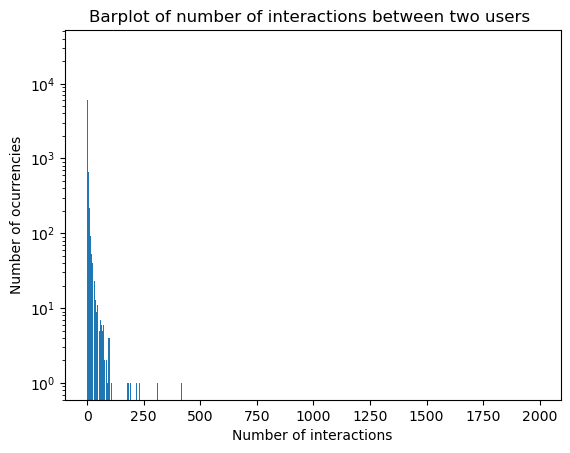

In [10]:
#Crear una lista con todos los valores de interacción
lista_interacciones = list(num_ocurs.values())
from collections import Counter

counts = Counter(lista_interacciones)


plt.bar(list(counts.keys()), list(counts.values()))

plt.xlabel('Number of interactions')
plt.ylabel('Number of ocurrencies')
plt.yscale('log', base = 10) 
plt.title('Barplot of number of interactions between two users ')
plt.show()

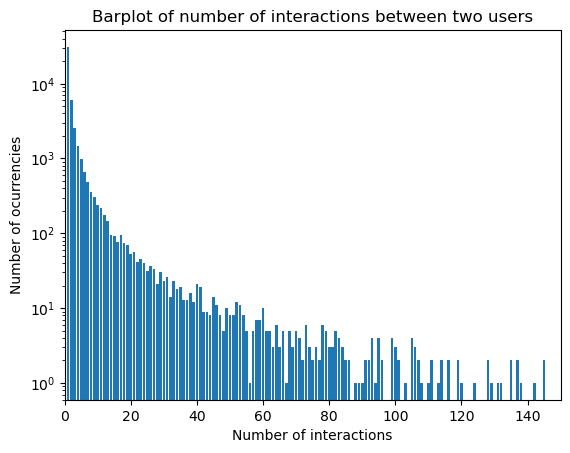

In [11]:
plt.bar(list(counts.keys()), list(counts.values()))

plt.xlabel('Number of interactions')
plt.ylabel('Number of ocurrencies')
plt.yscale('log', base = 10) 
plt.title('Barplot of number of interactions between two users')
plt.xlim(0,150)
plt.show()

In [12]:
counts = dict(sorted(counts.items()))
counts

{1: 30963,
 2: 6117,
 3: 2568,
 4: 1488,
 5: 979,
 6: 655,
 7: 482,
 8: 360,
 9: 303,
 10: 236,
 11: 216,
 12: 176,
 13: 144,
 14: 96,
 15: 92,
 16: 76,
 17: 96,
 18: 75,
 19: 69,
 20: 53,
 21: 57,
 22: 41,
 23: 46,
 24: 40,
 25: 31,
 26: 37,
 27: 33,
 28: 21,
 29: 30,
 30: 23,
 31: 26,
 32: 14,
 33: 23,
 34: 18,
 35: 19,
 36: 13,
 37: 13,
 38: 16,
 39: 12,
 40: 21,
 41: 19,
 42: 9,
 43: 9,
 44: 8,
 45: 14,
 46: 11,
 47: 8,
 48: 5,
 49: 10,
 50: 8,
 51: 8,
 52: 12,
 53: 11,
 54: 8,
 55: 5,
 56: 1,
 57: 5,
 58: 7,
 59: 7,
 60: 10,
 61: 5,
 62: 5,
 63: 3,
 64: 6,
 65: 3,
 66: 5,
 67: 1,
 68: 5,
 69: 3,
 70: 5,
 71: 4,
 72: 2,
 73: 6,
 74: 3,
 75: 2,
 76: 3,
 77: 2,
 78: 6,
 79: 5,
 80: 3,
 81: 3,
 82: 5,
 83: 4,
 84: 3,
 85: 2,
 86: 2,
 88: 1,
 89: 1,
 90: 1,
 91: 2,
 92: 2,
 93: 4,
 94: 1,
 95: 4,
 96: 2,
 99: 4,
 100: 3,
 101: 2,
 103: 1,
 105: 4,
 106: 3,
 107: 2,
 108: 1,
 110: 1,
 111: 2,
 113: 1,
 114: 2,
 116: 2,
 119: 2,
 120: 1,
 124: 1,
 128: 2,
 129: 1,
 131: 1,
 132: 1,
 135:

In [13]:
sum(counts.values())

46154

In [14]:
sum_of_occurences = 0
i=0
while sum_of_occurences<0.95*sum(counts.values()):
    sum_of_occurences += list(counts.values())[i]
    mykey = list(counts.keys())[i]
    i+=1

In [15]:
mykey

9

# Epidemic model

In [16]:
from ndlib.models import epidemics
import ndlib.models.ModelConfig as config


In [17]:
nodes_with_high_weight_edges = []

for i in range(len(A)):
    for j in range(len(A)):
        if A[i][j] > 9:
            nodes_with_high_weight_edges.append((i, j))

infected_nodes = []
for item in nodes_with_high_weight_edges:
    if item[0] not in infected_nodes:
        infected_nodes.append(item[0])
    if item[1] not in infected_nodes:
        infected_nodes.append(item[1])


In [66]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
model_c = ep.ThresholdModel(G)

# set the initial status with the infected nodes
config_c = mc.Configuration()
config_c.add_model_initial_configuration("Infected", infected_nodes)
for node in G.nodes():
    config_c.add_node_configuration("threshold", node, 0.9)
model_c.set_initial_status(config_c)

iterations_c = model_c.iteration_bunch(11)
trends_c = model_c.build_trends(iterations_c)

<IPython.core.display.Javascript object>


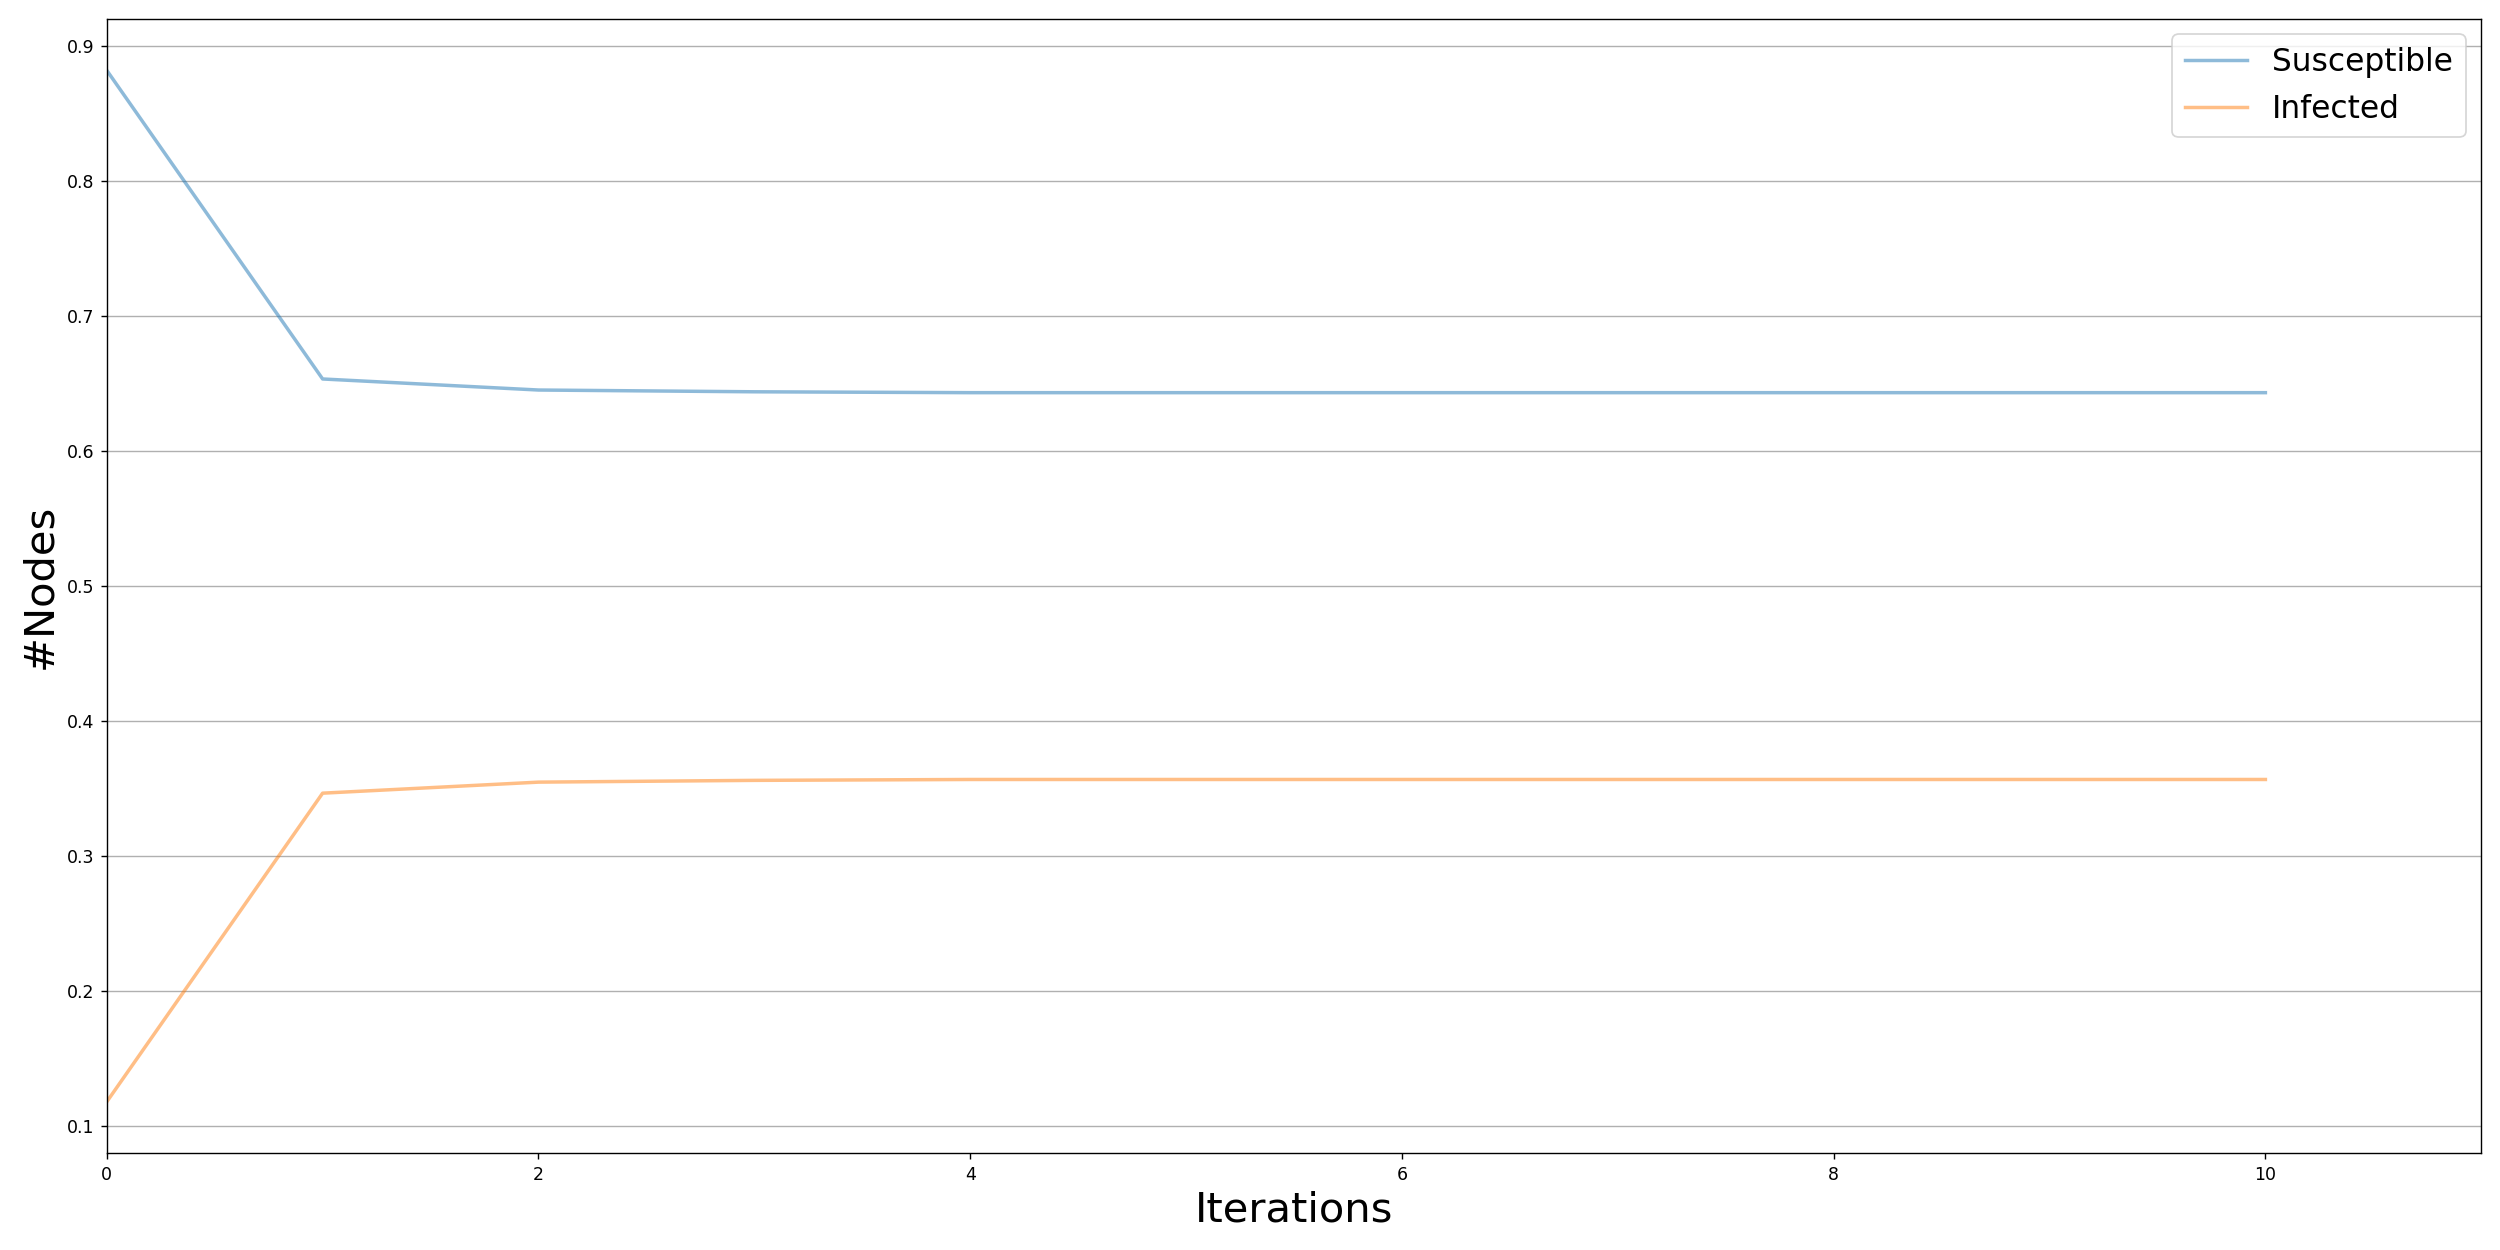

In [67]:
%matplotlib notebook
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model_c, trends_c)
viz.plot()
plt.show()

In [20]:
len(infected_nodes)/nx.number_of_nodes(G)

0.11805101373446697

In [55]:
model_d = ep.ThresholdModel(G)

# set the initial status with the infected nodes
config_d = mc.Configuration()
config_dadd_model_initial_configuration("Infected", infected_nodes)
for node in G.nodes():
    config_d.add_node_configuration("threshold", node, 0.1)
model_d.set_initial_status(config_d)

iterations_d = model_d.iteration_bunch(11)
trends_d = model_d.build_trends(iterations_d)

<IPython.core.display.Javascript object>


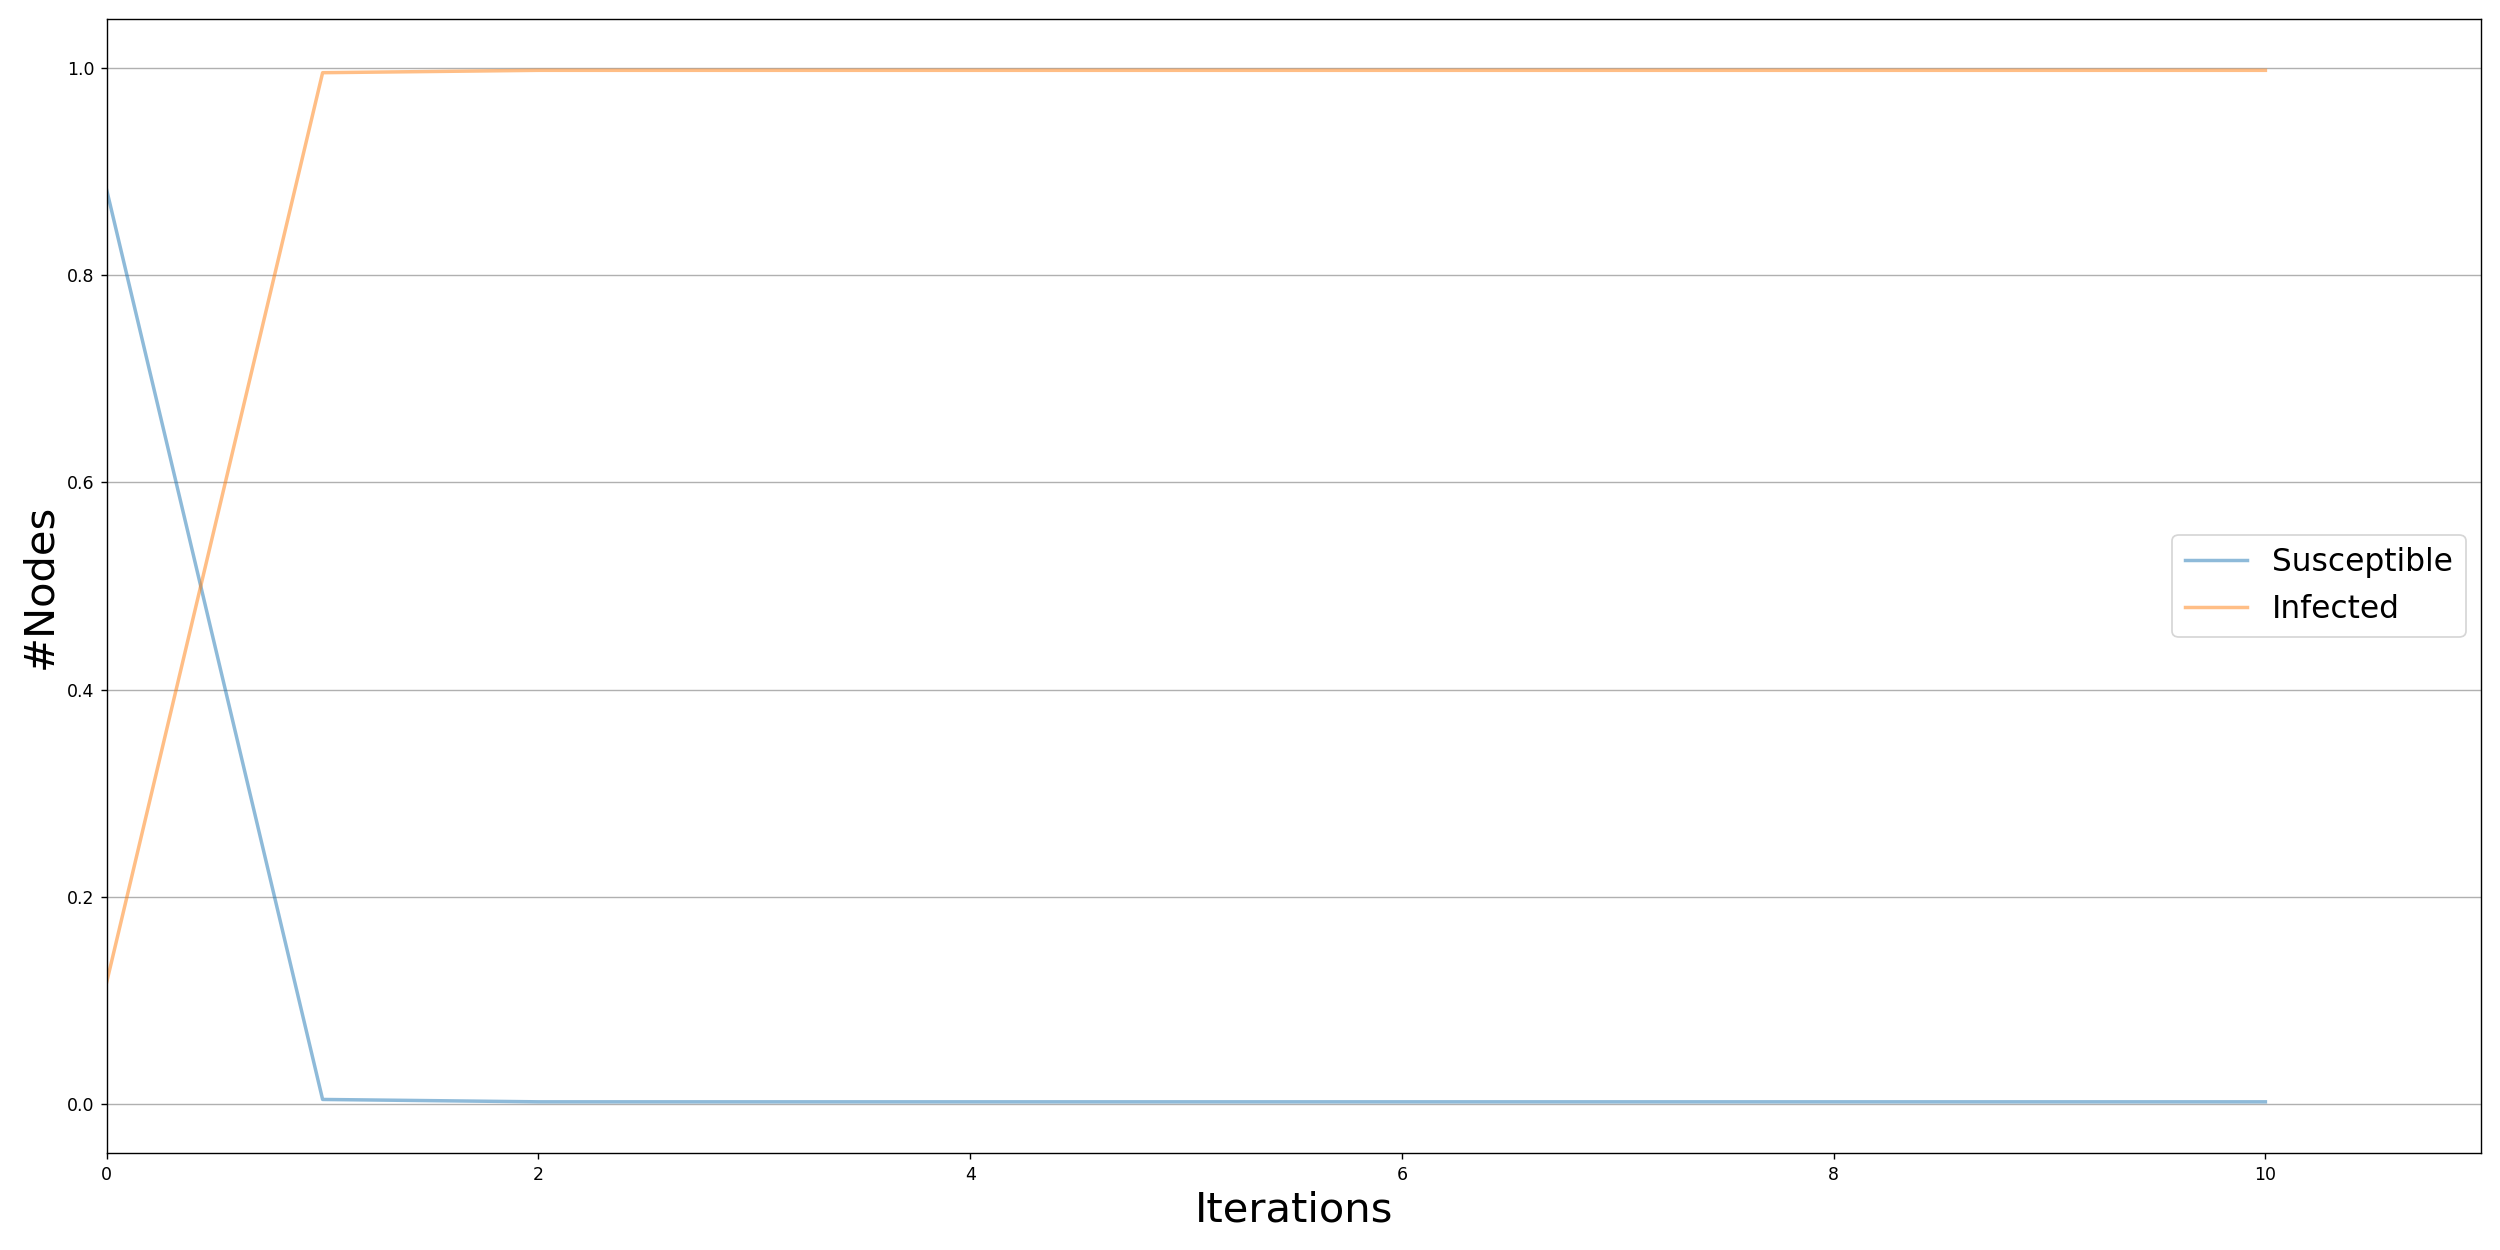

In [57]:
%matplotlib notebook
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_d, trends_d)
viz.plot()

In [62]:
model_e = ep.ThresholdModel(G)

# set the initial status with the infected nodes
config_e = mc.Configuration()
config_e.add_model_initial_configuration("Infected", infected_nodes)
for node in G.nodes():
    config_e.add_node_configuration("threshold", node, 0.5)
model_e.set_initial_status(config_e)

iterations_e = model_e.iteration_bunch(11)
trends_e = model_c.build_trends(iterations_e)

<IPython.core.display.Javascript object>


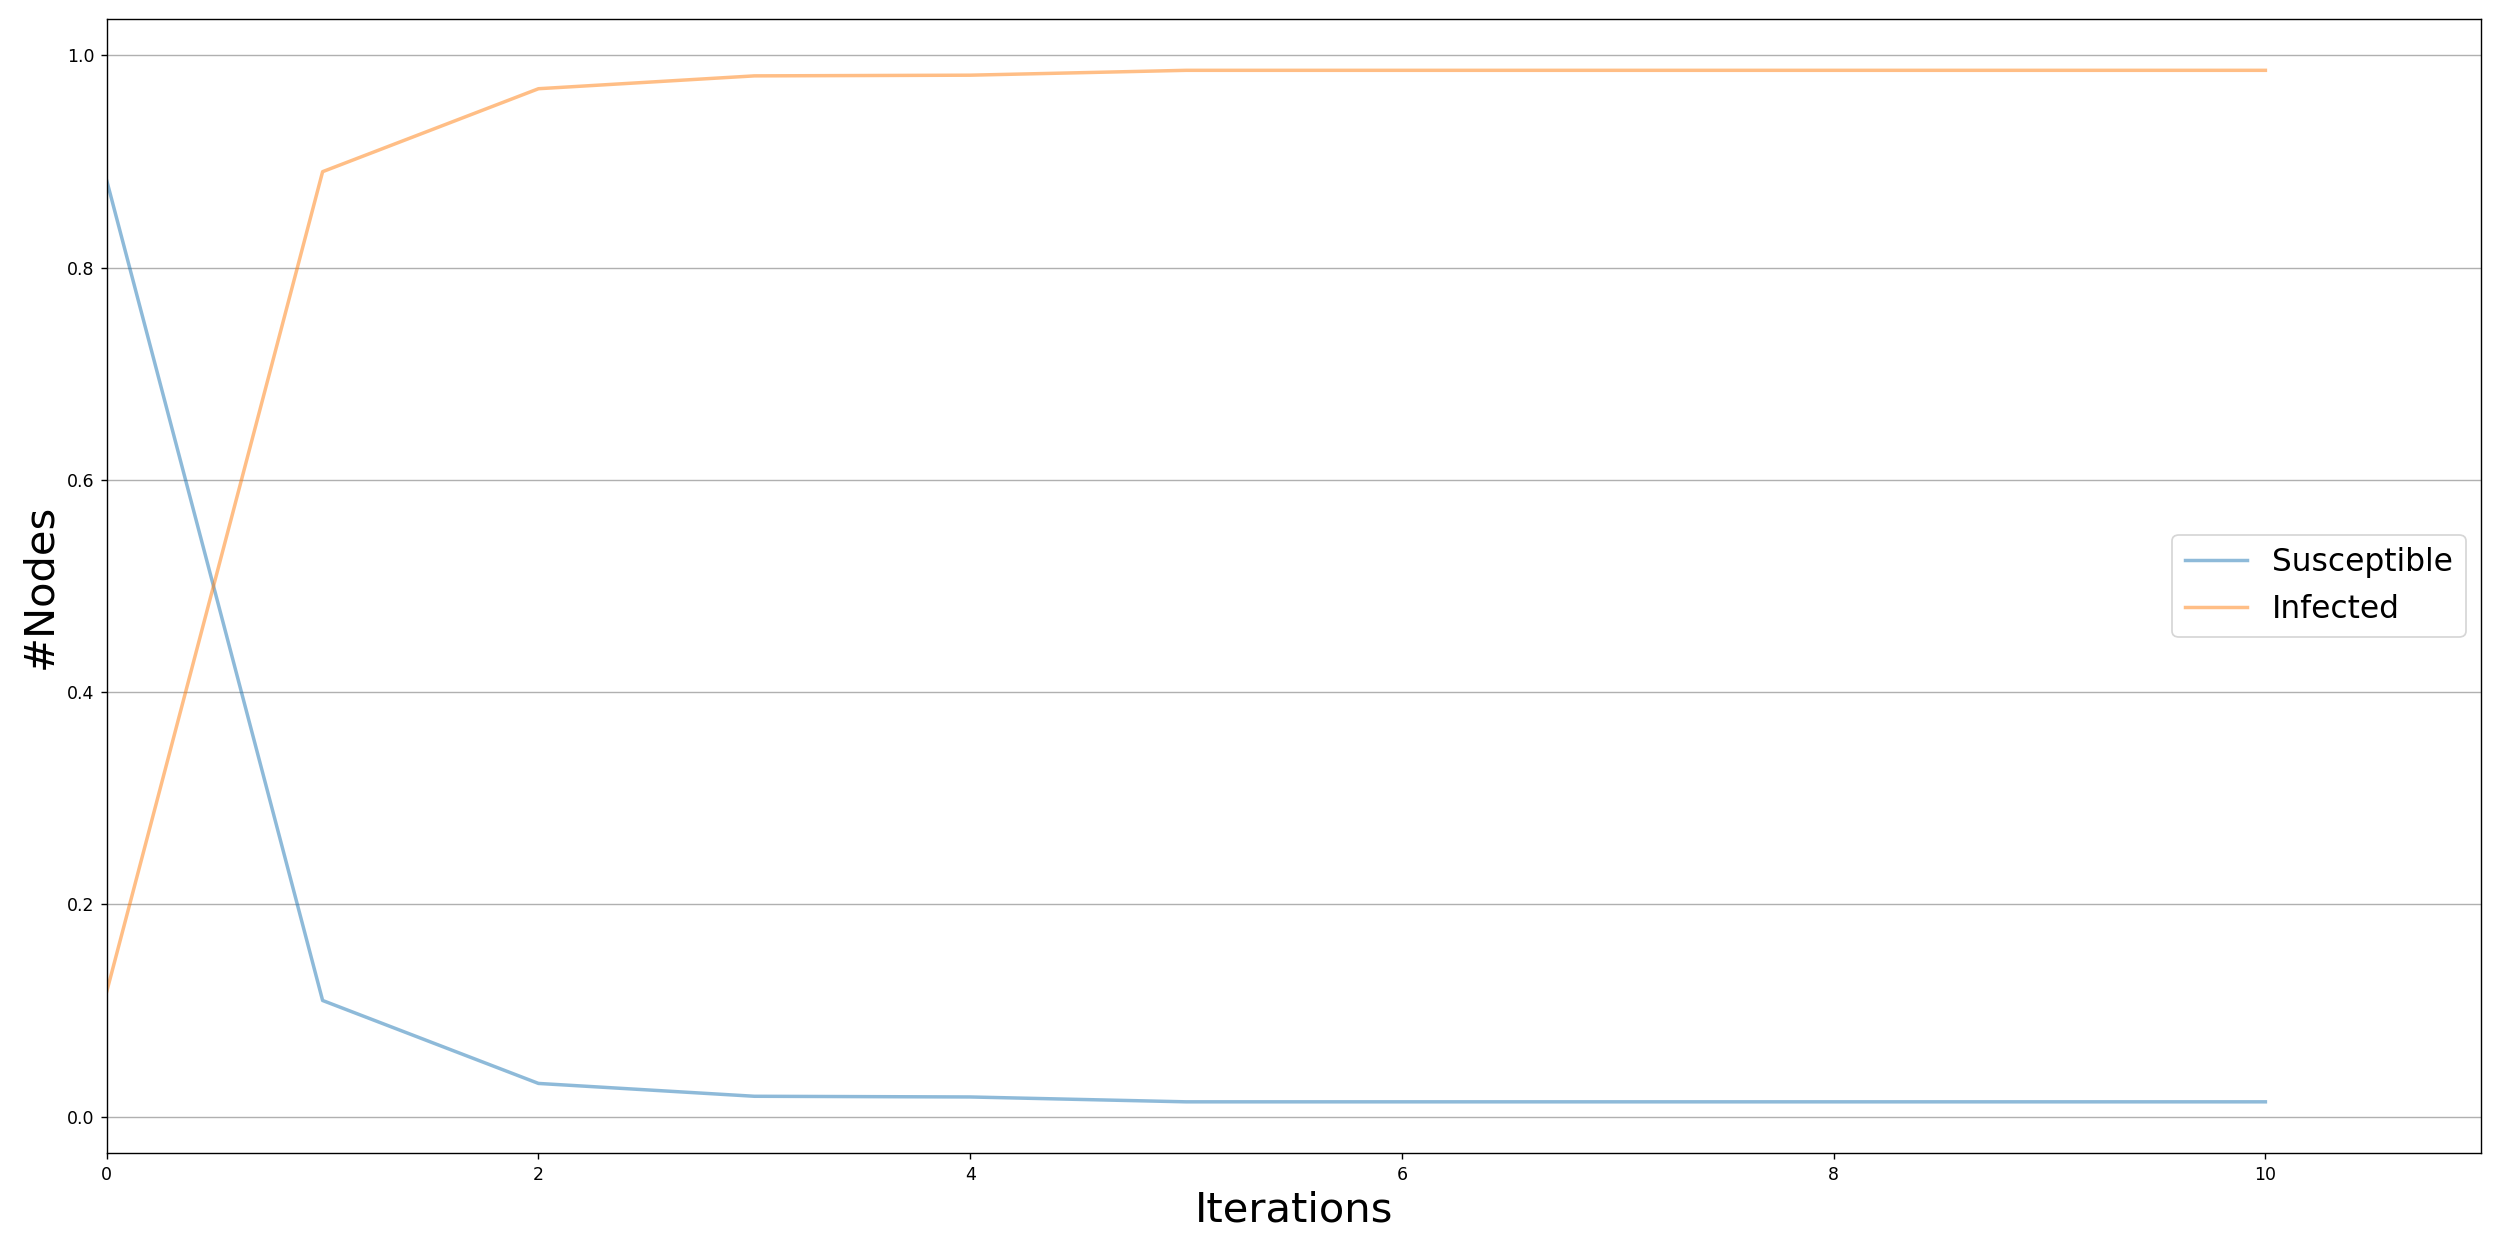

In [63]:
%matplotlib notebook
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_e, trends_e)
viz.plot()

<IPython.core.display.Javascript object>


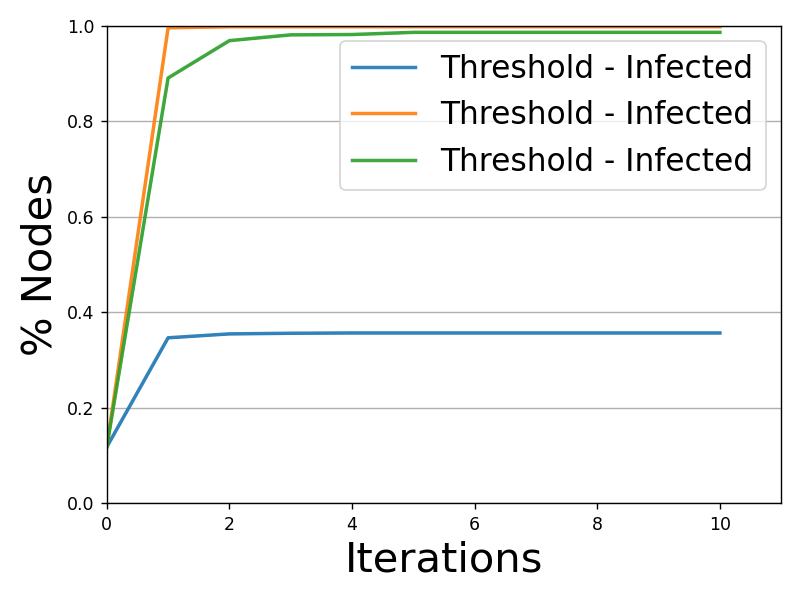

In [76]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
from matplotlib.pyplot import legend
%matplotlib notebook
viz = DiffusionTrendComparison(
    [model_c, model_d,model_e], [trends_c, trends_d, trends_e], statuses = ['Infected'])
viz.plot ()